# Housing Data Analysis
A comprehensive guide to loading, exploring, and preparing housing data for machine learning modeling.

In [26]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Step 1: Load Housing Data
Load the housing dataset from the CSV file located in the current working directory.

In [14]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "housing.csv")  # creates a file path to the csv file in the current working directory
housing_data = pd.read_csv(filepath)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Step 2: Explore Dataset
Get basic statistics and information about the housing data.

In [ ]:
# Dataset Info
housing_data.info()

In [ ]:
# Statistical Summary
housing_data.describe()

In [ ]:
# Value Counts for Categorical Feature
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: title={'center': 'Ocean Proximity Distribution'}, ylabel='ocean_proximity'>

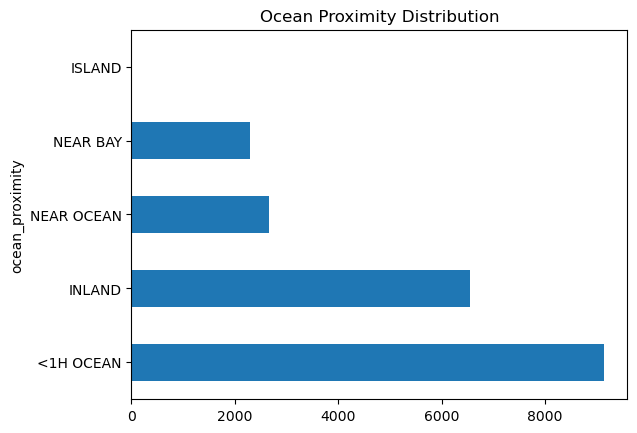

In [21]:
# Analyze ocean_proximity distribution
housing_data["ocean_proximity"].value_counts().plot(kind='barh', title='Ocean Proximity Distribution')

<Axes: >

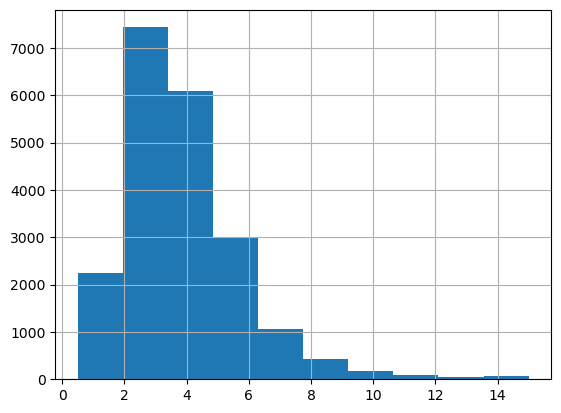

In [19]:
# Median Income Distribution
housing_data["median_income"].hist()

## Step 3: Feature Engineering
Create income categories by binning the median income feature into ordinal categories.

In [22]:
# Create income categories
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels=[1, 2, 3, 4, 5])

# Print value counts
housing_data["income_cat"].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

<Axes: >

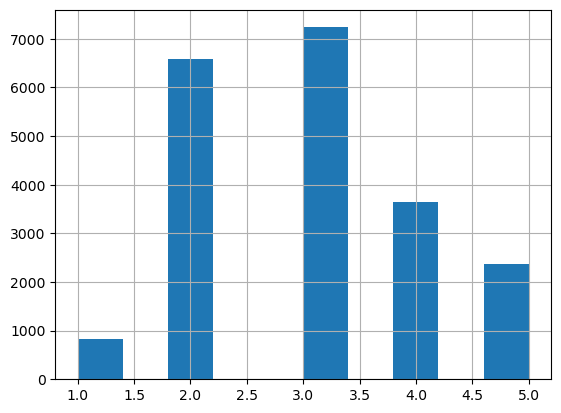

In [23]:
# Income Category Distribution
housing_data["income_cat"].hist()

## Step 4: Prepare Features and Target
Separate the target variable (median house value) from the features.

In [24]:
# Separate target from features
y = housing_data["median_house_value"]  # Target variable
X = housing_data.drop("median_house_value", axis=1)  # Features
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


## Step 5: Train-Test Split
Split the dataset into training and test sets using simple train-test split.

In [27]:
# Simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13228,-117.68,34.15,24.0,1033.0,189.0,486.0,204.0,4.1719,INLAND,3
20104,-120.33,37.97,17.0,2530.0,526.0,1024.0,496.0,2.0057,INLAND,2
13434,-117.43,34.10,43.0,1898.0,418.0,971.0,366.0,2.4735,INLAND,2
3818,-118.50,34.20,34.0,1617.0,344.0,938.0,305.0,3.9150,<1H OCEAN,3
15552,-117.08,33.12,37.0,1060.0,268.0,823.0,229.0,1.8363,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...
11042,-117.82,33.81,19.0,2556.0,304.0,822.0,260.0,9.9055,<1H OCEAN,5
14515,-117.16,32.89,5.0,8576.0,1952.0,5006.0,1827.0,4.3598,<1H OCEAN,3
10770,-117.90,33.66,13.0,1642.0,423.0,841.0,368.0,3.6042,<1H OCEAN,3
8732,-118.32,33.84,42.0,1486.0,420.0,897.0,377.0,1.6228,<1H OCEAN,2


## Step 6: Stratified Train-Test Split
Use stratified sampling to maintain the distribution of income categories in both train and test sets.

In [29]:
# Stratified train-test split using income categories
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]


In [30]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [31]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [33]:
housing_data["income_cat"].value_counts() / len(housing_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [34]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
strat_test_set.drop("income_cat", axis=1, inplace=True)
strat_train_set.drop("income_cat", axis=1, inplace=True)

In [37]:
housing = strat_train_set.copy()

# Visualizing our data


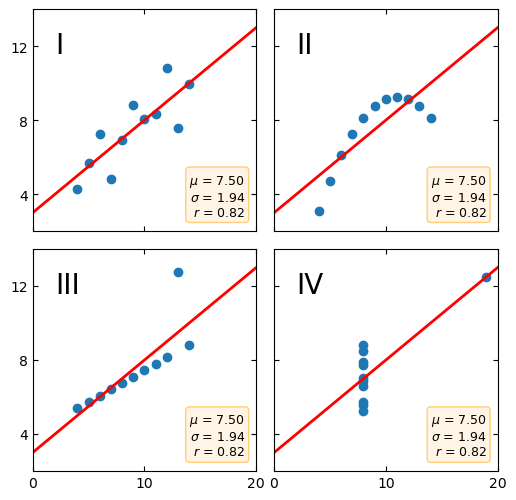

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

## Histogram

In [38]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

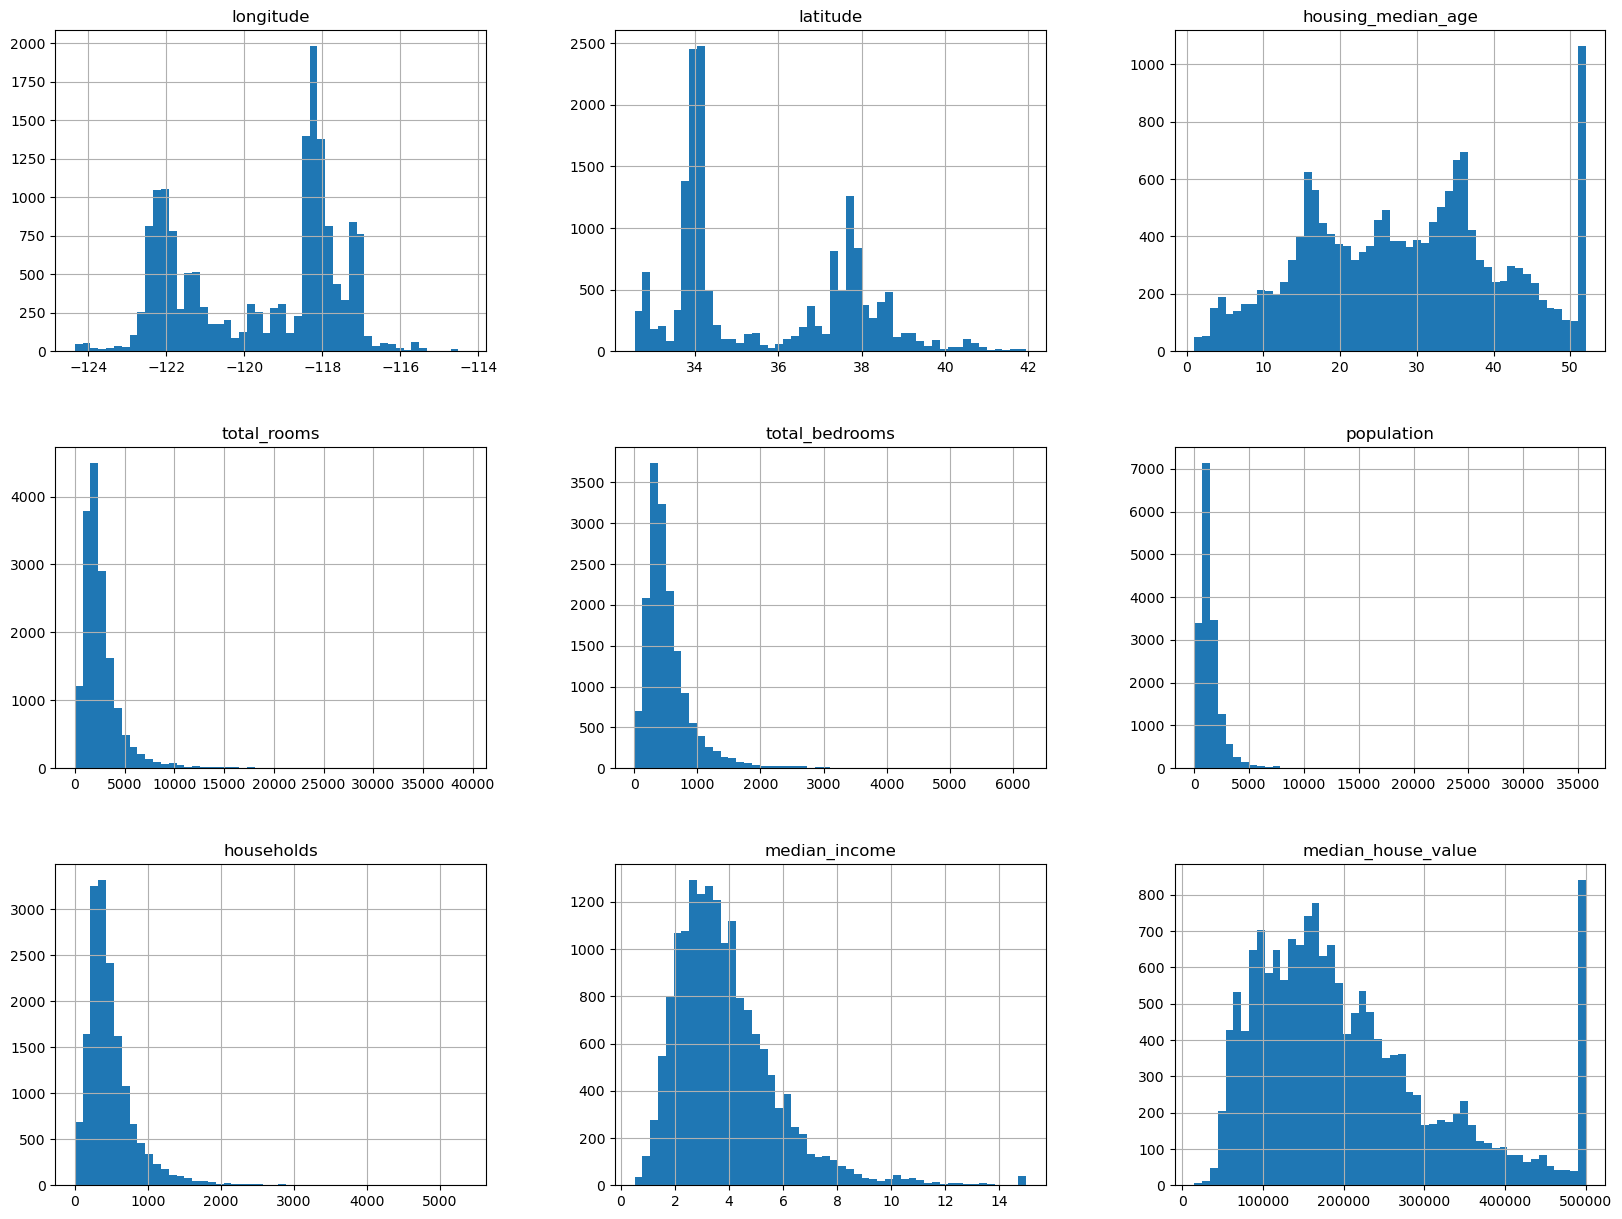

In [40]:
housing.hist(bins=50, figsize=(20,15))

<Axes: >

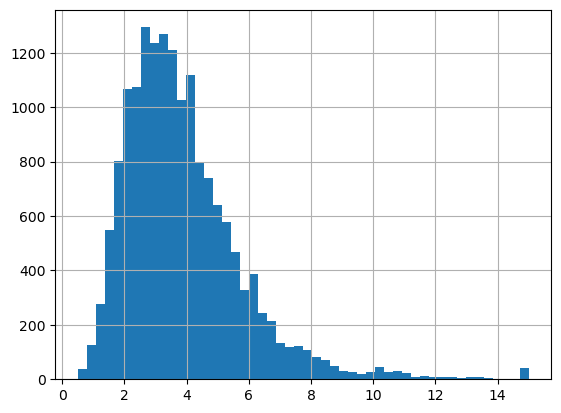

In [42]:
housing["median_income"].hist(bins=50)

## Geographic Data

<Axes: xlabel='longitude', ylabel='latitude'>

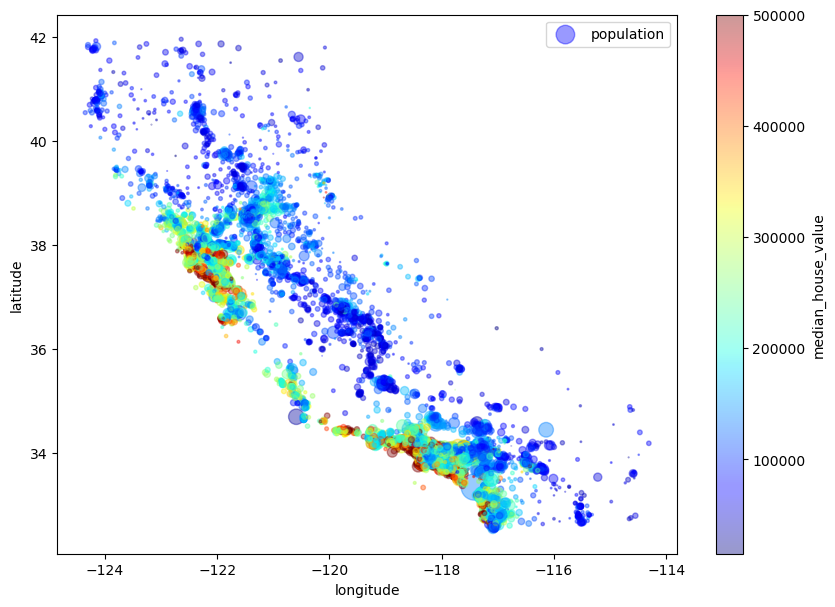

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)

## Correlation Matrices

In [46]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<Axes: >

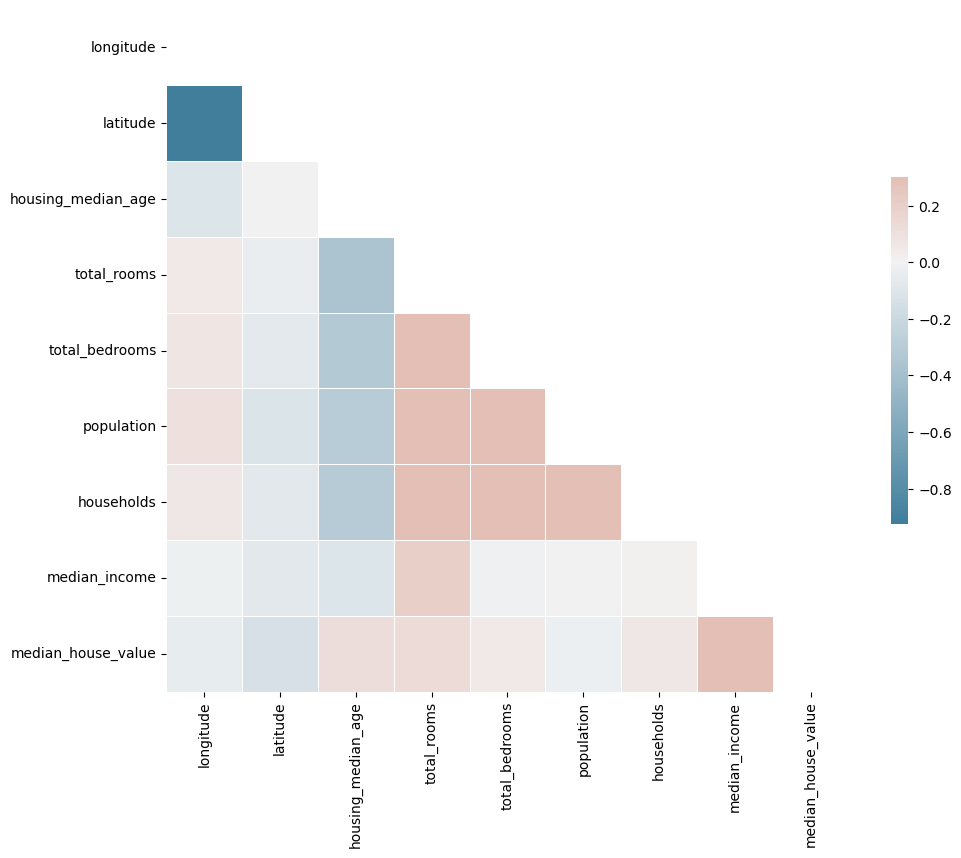

In [47]:
import seaborn as sns
corr = housing.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))
camp = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=camp, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Preparing Data for Machine Learning

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Dealing with Missing Values

In [48]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,85000.0,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,177000.0,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,146500.0,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,214800.0,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,500001.0,NEAR OCEAN,5


In [49]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat


In [50]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)          # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,85000.0,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,177000.0,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,146500.0,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,214800.0,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,500001.0,NEAR OCEAN,5


In [52]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"] = sample_incomplete_rows["total_bedrooms"].fillna(median)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,85000.0,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,177000.0,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,146500.0,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,214800.0,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,500001.0,NEAR OCEAN,5


In [53]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [55]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0


In [58]:
imputer.fit(housing_num)
SimpleImputer(strategy='median')

SimpleImputer(strategy='median')

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0


In [60]:
imputer.strategy

'median'

## Encode Categorical Variables

In [61]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [62]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [63]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [66]:
from sklearn.preprocessing import OneHotEncoder

# scikit-learn 1.2+ renamed `sparse` to `sparse_output`
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot # Creates a "dense array" meaning that all instances have a value not just the ones that are encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Feature Engineering

In [69]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data

In [70]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,3.168555,1.128895
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,2.623698,1.113281
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,2.223333,1.033333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,1.859213,1.074534
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,3.167241,1.113793
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,6.658342,2.023976,1.229770
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,5.571932,3.363188,1.002821
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,4.110465,2.662791,0.965116
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,6.297405,2.411178,1.157685


# Scaling our Data

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264,  0.05896205],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077,  0.02830837],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.1286475 ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619, -0.26257303],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604,  0.11548226],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083,  0.05505203]])

# Pipelines

In [75]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


def data_transformations(data):

    ### SEparate Labels if they exist ###
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)

    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse_output=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()  # Adding the new one-hot encoded categories to our features list
    features.remove("ocean_proximity")  # We are encoding this variable so we don't need it in our list anymore

    ### Scaling Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    housing_scaled = scaler.fit_transform(imputed)

    ### Concatennating all data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

# Select and Train Model

In [76]:
train_data, train_labels, features = data_transformations(strat_train_set)
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  1.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  1.        ,
         0.        ,  0.        ]])

In [77]:
features # just another word for columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [78]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  1.        ,
         0.        ,  0.        ]])

### Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [80]:
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

predicted_values

array([430593.09139203, 285374.20248105, 232712.80034971, 194717.72886789,
       248240.73099997])

In [82]:
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data = {"Original Values": original_values,
                                          "Predicted Values": predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]
comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,430593.091392,69407.908608
17352,162500.0,285374.202481,-122874.202481
3505,204600.0,232712.800350,-28112.800350
7777,159700.0,194717.728868,-35017.728868
14155,184000.0,248240.731000,-64240.731000


In [81]:
test_data[:5]

array([[ 0.57507019, -0.69657252,  0.0329564 ,  1.60221759,  1.02575422,
         0.61433044,  1.10480288,  2.35845461, -0.11480538, -0.43699104,
         0.73101229,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.43480141, -0.33466769, -0.36298077, -0.2850545 , -0.53426286,
        -0.49592674, -0.55602421,  0.61735909, -0.01488582,  0.03395612,
         0.96266687,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, -0.52677198, -0.61613609,
        -0.53519092, -0.57564994,  0.28422164, -0.35074755, -0.01843971,
        -0.05472704,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.71933757, -0.79527384,  0.508081  , -0.44151008

In [83]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(72192.755607005)

In [84]:
# Bring in the Metrics
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

63930.67426131759

# Decision Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [87]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

# Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [89]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [70824.86460222 69265.43911105 70860.89128052 73143.6242732
 68189.79683417 74845.58694955 75712.26299821 70925.68914136
 69652.74404875 72834.24516312]
Mean: 71625.51444021543
Standard deviation: 2319.858754337931


# Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

RandomForestRegressor(random_state=42)

In [91]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18796.98816862067)

In [92]:
# This can take a while deplending on your hardware

from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51625.50923449 49595.77026479 46903.21986648 52054.44580805
 48038.01373657 51150.37967136 53115.15634704 50223.15213256
 48384.96672942 54583.30969038]
Mean: 50567.3923481122
Standard deviation: 2279.0119694027167


In [93]:
scores = cross_val_score(lin_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68414.805622
std       2279.550831
min      64628.721920
25%      66812.103554
50%      68717.588588
75%      69608.531770
max      71719.029644
dtype: float64

# Fine Tuning the Model

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3X4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},

    # then try 6 (2X3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64772.12310826017 {'max_features': 2, 'n_estimators': 3}
57107.18573603425 {'max_features': 2, 'n_estimators': 10}
54465.398620424625 {'max_features': 2, 'n_estimators': 30}
62065.79799705809 {'max_features': 4, 'n_estimators': 3}
54799.23918359469 {'max_features': 4, 'n_estimators': 10}
52251.42550351866 {'max_features': 4, 'n_estimators': 30}
61827.24216362284 {'max_features': 6, 'n_estimators': 3}
54454.39027503683 {'max_features': 6, 'n_estimators': 10}
51699.580397496175 {'max_features': 6, 'n_estimators': 30}
59714.39845322457 {'max_features': 8, 'n_estimators': 3}
52876.605451629955 {'max_features': 8, 'n_estimators': 10}
51253.27811015222 {'max_features': 8, 'n_estimators': 30}
63107.485726344115 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55910.52432366365 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62249.214957622506 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54801.69458055852 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [99]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043256,0.007207,0.002139,0.000309,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.068157e+09,-4.278945e+09,...,-4.195428e+09,1.570450e+08,18,-1.098594e+09,-1.124353e+09,-1.157133e+09,-1.112072e+09,-1.111546e+09,-1.120740e+09,1.993788e+07
1,0.123124,0.001065,0.006041,0.000135,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.184555e+09,-3.154756e+09,...,-3.261231e+09,1.014873e+08,11,-6.089889e+08,-6.080849e+08,-6.162242e+08,-6.119024e+08,-6.286304e+08,-6.147661e+08,7.490778e+06
2,0.376640,0.026721,0.017559,0.000780,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.942410e+09,-2.895381e+09,...,-2.966480e+09,7.330395e+07,7,-4.546857e+08,-4.649104e+08,-4.595699e+08,-4.515982e+08,-4.613423e+08,-4.584213e+08,4.742789e+06
3,0.062985,0.000986,0.002165,0.000131,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.881516e+09,-3.750860e+09,...,-3.852163e+09,7.300541e+07,15,-1.083642e+09,-1.082896e+09,-1.057100e+09,-1.040027e+09,-1.030068e+09,-1.058746e+09,2.181094e+07
4,0.216631,0.014468,0.007224,0.001853,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.087652e+09,-2.974170e+09,...,-3.002957e+09,6.967341e+07,8,-5.679803e+08,-5.811372e+08,-5.567299e+08,-5.779105e+08,-5.693073e+08,-5.706130e+08,8.548539e+06
5,0.624899,0.087489,0.017809,0.000941,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.788451e+09,-2.672645e+09,...,-2.730211e+09,5.669557e+07,3,-4.221290e+08,-4.313237e+08,-4.179512e+08,-4.194503e+08,-4.124533e+08,-4.206615e+08,6.197145e+06
6,0.088766,0.005385,0.002358,0.000378,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.907595e+09,-3.700241e+09,...,-3.822608e+09,1.355843e+08,14,-1.033863e+09,-1.037869e+09,-1.022624e+09,-9.803330e+08,-1.008652e+09,-1.016668e+09,2.080919e+07
7,0.315321,0.019403,0.007122,0.001077,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.998511e+09,-2.773622e+09,...,-2.965281e+09,1.064917e+08,6,-5.412755e+08,-5.455482e+08,-5.567747e+08,-5.415096e+08,-5.626985e+08,-5.495613e+08,8.651109e+06
8,0.838388,0.036539,0.017400,0.000611,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.647417e+09,-2.596909e+09,...,-2.672847e+09,6.562391e+07,2,-4.032201e+08,-4.124683e+08,-4.162165e+08,-3.988323e+08,-4.162199e+08,-4.093914e+08,7.102939e+06
9,0.107659,0.000815,0.002035,0.000066,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.717909e+09,-3.631879e+09,...,-3.565809e+09,1.178722e+08,12,-1.008168e+09,-9.676311e+08,-9.464076e+08,-9.396094e+08,-9.169553e+08,-9.557542e+08,3.079487e+07


# Randomized Search
#### Allows you to more easily find the hyperparameters that we're interested in because instead of search through all posssible combinations, it randomly picks a couple and tries those out

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_Search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5,
                                scoring='neg_mean_squared_error',
                                random_state=42)
rnd_Search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1686c4690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16816fcb0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [102]:
cvres = rnd_Search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50328.151594744944 {'max_features': 7, 'n_estimators': 180}
53092.39469233686 {'max_features': 5, 'n_estimators': 15}
52241.91898920073 {'max_features': 3, 'n_estimators': 72}
52189.297463440555 {'max_features': 5, 'n_estimators': 21}
50484.57189087649 {'max_features': 7, 'n_estimators': 122}
52216.28727685344 {'max_features': 3, 'n_estimators': 75}
52181.99040633344 {'max_features': 3, 'n_estimators': 88}
50960.749886872545 {'max_features': 5, 'n_estimators': 100}
51942.04441057819 {'max_features': 3, 'n_estimators': 150}
64994.2748914946 {'max_features': 5, 'n_estimators': 2}


In [103]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.39148152e-02, 5.58051520e-02, 4.52333526e-02, 1.69086980e-02,
       1.86781006e-02, 1.84525201e-02, 1.70122234e-02, 2.56282131e-01,
       2.36956639e-02, 1.05468475e-01, 5.43667936e-02, 9.28615766e-03,
       1.15898730e-01, 3.76790054e-05, 2.17296068e-03, 4.19236859e-03,
       2.02315059e-03, 4.43890239e-02, 6.11099367e-03, 1.21321077e-02,
       1.27938903e-01])

# Feature Importance List

In [104]:
feature_importances_list = list(zip(features, feature_importances.tolist()))
feature_importances_list


[('longitude', 0.06391481524820196),
 ('latitude', 0.0558051520001248),
 ('housing_median_age', 0.04523335261246931),
 ('total_rooms', 0.0169086979737779),
 ('total_bedrooms', 0.018678100553504214),
 ('population', 0.01845252007443641),
 ('households', 0.017012223418439),
 ('median_income', 0.25628213062864275),
 ('income_cat', 0.023695663893963662),
 ('bedrooms_per_household', 0.10546847471924357),
 ('population_per_household', 0.05436679364054505),
 ('rooms_per_household', 0.009286157655835984),
 ('<1H OCEAN', 0.11589873003839202),
 ('INLAND', 3.7679005372230556e-05),
 ('ISLAND', 0.002172960681929281),
 ('NEAR BAY', 0.004192368593646193),
 ('NEAR OCEAN', 0.0020231505862897607)]

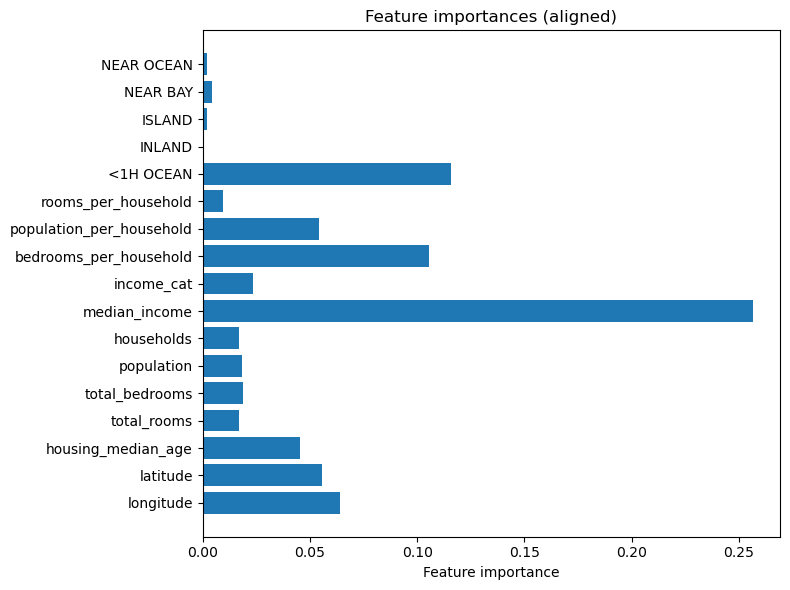

In [106]:
# Align feature names with importances (use the zipped list which matches lengths)
labels = [name for name, _ in feature_importances_list]
importances = [imp for _, imp in feature_importances_list]

plt.figure(figsize=(8, 6))
plt.barh(labels, importances)
plt.xlabel("Feature importance")
plt.title("Feature importances (aligned)")
plt.tight_layout()

In [108]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


np.float64(66724.91323204986)